# Random Forest Project Tutorial


Un random forest es un método de Machine Learning que se utiliza para tareas de clasificación y regresión. Es un tipo de aprendizaje en el que se ensamblan modelos (model ensembling) para combinar las predicciones de múltiples árboles de decisión y generar así una salida más precisa y robusta.

Cada árbol en un random forest se construye de manera independiente utilizando un subconjunto aleatorio de los datos de entrenamiento. Luego, para hacer la predicción, cada árbol en el bosque hace su propia predicción y la predicción final se toma por votación de mayoría en el caso de clasificación, o promedio en el caso de regresión.

### Predicting Diabetes

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

In this dataset you will find the following variables:

- Pregnancies. Number of pregnancies of the patient (numeric)
- Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
- SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
- Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
- BMI. Body mass index (numeric)
- DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
- Age. Age of patient (numeric)
- Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)


# El objetivo es mejorar la predicción obtenida con el modelo de Decision Tree anterior (pasos 1 a 3 son los mismos)

## Step 1: Loading the dataset

In [1]:
# Cargamos la librería pandas
import pandas as pd

In [2]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


El dataset cuenta con 9 columnas y 768 filas. 7 puntos de datos son numéricos y 2 son contínuos. No hay valores nulos.

In [4]:
# Hacemos el escalado de valores, donde normalizamos los datos para que puedan ser comparables entre sí
from sklearn.preprocessing import StandardScaler

num_variables = [col for col in dataframe.columns if col != 'Outcome']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataframe[num_variables])
total_data_scal = pd.DataFrame(scaled_features, index = dataframe.index, columns = num_variables)
total_data_scal['Outcome'] = dataframe['Outcome']

In [5]:
# Dividimos entre train y test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

x = total_data_scal[num_variables]
y = dataframe['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
train_ids = X_train.index.values
test_ids = X_test.index.values

In [6]:
# Seleccionamos las variables
selector = SelectKBest(k = 7)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
X_test_selected = X_test[selected_features]
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

In [7]:
# Volvemos a juntar train y test
data_train_combined = pd.concat([X_train_filtered, y_train], axis = 1)
data_test_combined = pd.concat([X_test_filtered, y_test], axis = 1)
data_train_combined.index = train_ids
data_test_combined.index = test_ids
data_combined = pd.concat([data_train_combined, data_test_combined])

## Step 2: Perform a full EDA

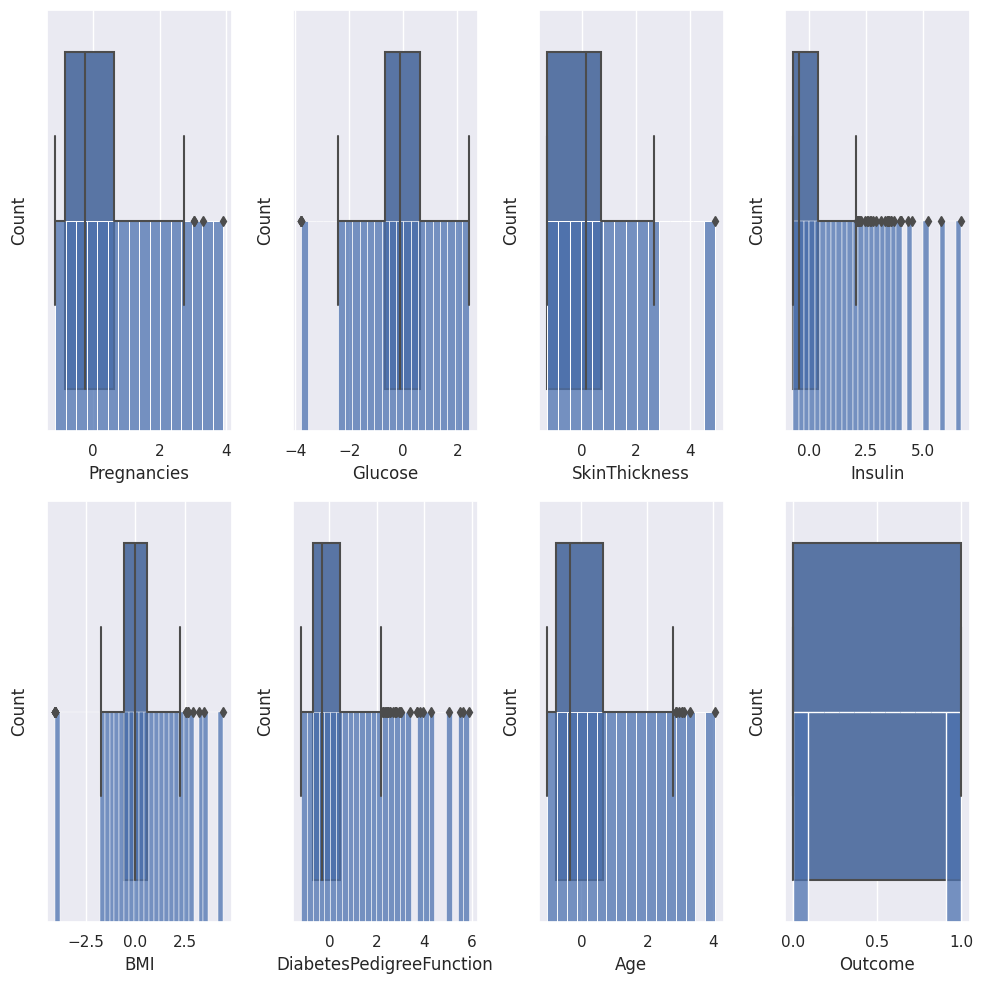

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline


# Assuming you have your data in a DataFrame called 'data_combined'
column_names = data_combined.columns
num_subplots = len(column_names)

# Determine the grid arrangement for subplots
num_rows = 2
num_cols = (num_subplots + num_rows - 1) // num_rows  # Ceiling division to make sure all subplots are accommodated

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Flatten the axes if needed
axes = axes.flatten()

# Plot the data on each subplot
for i, col_name in enumerate(column_names):
    sns.histplot(data=data_combined, x=col_name, ax=axes[i])  # Modify this line based on your desired plot type
    sns.boxplot(data=data_combined, x=col_name, ax=axes[i])
# Remove any extra empty subplots if the number of subplots is not a perfect multiple of num_rows x num_cols
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


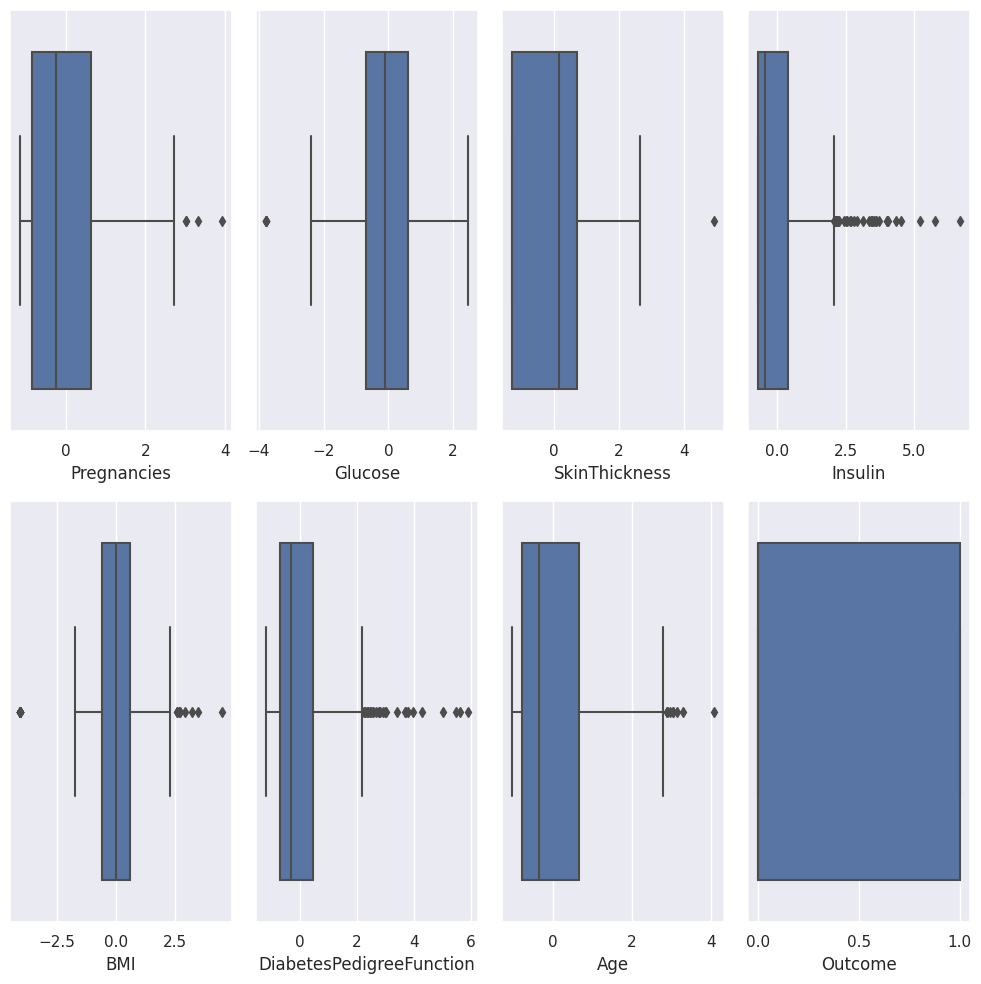

In [9]:
# Assuming you have your data in a DataFrame called 'data_combined'
column_names = data_combined.columns
num_subplots = len(column_names)

# Determine the grid arrangement for subplots
num_rows = 2
num_cols = (num_subplots + num_rows - 1) // num_rows  # Ceiling division to make sure all subplots are accommodated

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

# Flatten the axes if needed
axes = axes.flatten()

# Plot the data on each subplot
for i, col_name in enumerate(column_names):
    sns.boxplot(data=data_combined, x=col_name, ax=axes[i])  # Modify this line based on your desired plot type

# Remove any extra empty subplots if the number of subplots is not a perfect multiple of num_rows x num_cols
if num_subplots < num_rows * num_cols:
    for i in range(num_subplots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

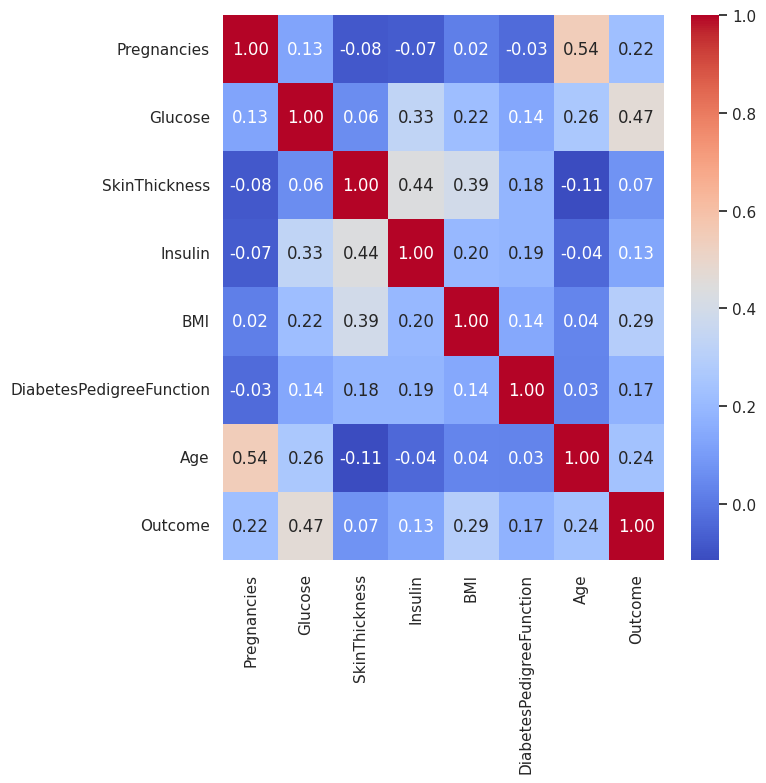

In [10]:
# Vemos el mapa de correlaciones entre todas las variables
corr_matrix = data_combined.corr()

fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', ax = ax)

plt.tight_layout()

plt.show()

In [11]:
# Vemos si el dataset tiene valores duplicados
print(dataframe[dataframe.duplicated()])


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [12]:
# Dividimos el dataframe de nuevo en train y test
num_variables = [col for col in data_combined.columns if col != 'Outcome']
x = data_combined.drop('Outcome', axis = 1)
y = data_combined['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
# Se aplica el método Kbest, donde se escogerán las características más relevantes del dataset en relación con nuestra variable objetivo
from sklearn.feature_selection import SelectKBest, f_regression
selection_model = SelectKBest(f_regression, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.233880,1.036107,-0.692891,0.051710,-0.087210,1.000557
1,-0.547919,-1.123396,-0.692891,0.965528,1.383588,-0.531023
2,1.827813,0.848324,1.364956,0.711690,1.598016,1.511083
3,1.233880,-1.154694,-0.692891,0.800533,-0.044928,0.490030
4,0.639947,-0.591345,-0.692891,0.470543,0.610438,-0.445935


## Step 3: Build a decision tree model


In [14]:
# Inicializamos y entrenamos el modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

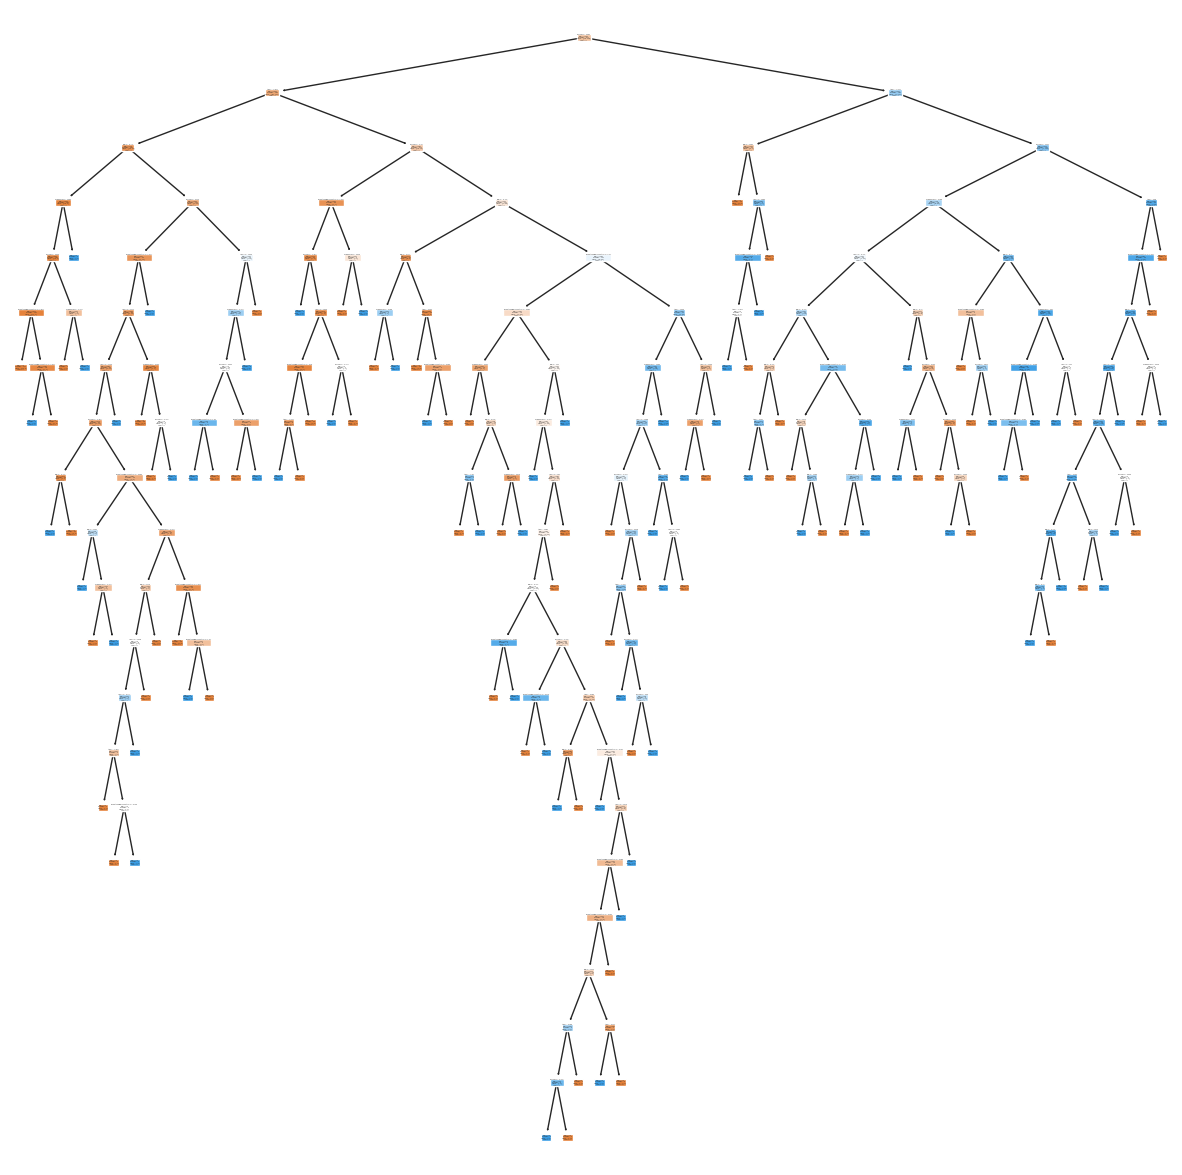

In [15]:
# Visualizamos el árbol
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [16]:
# Predecimos el conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [17]:
# Comprobamos la precisión del modelo
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6558441558441559

In [18]:
# Guardamos el modelo
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

## 4. Implementamos el modelo de Random Forest



In [19]:
# Inicializamos y entrenamos el modelo
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

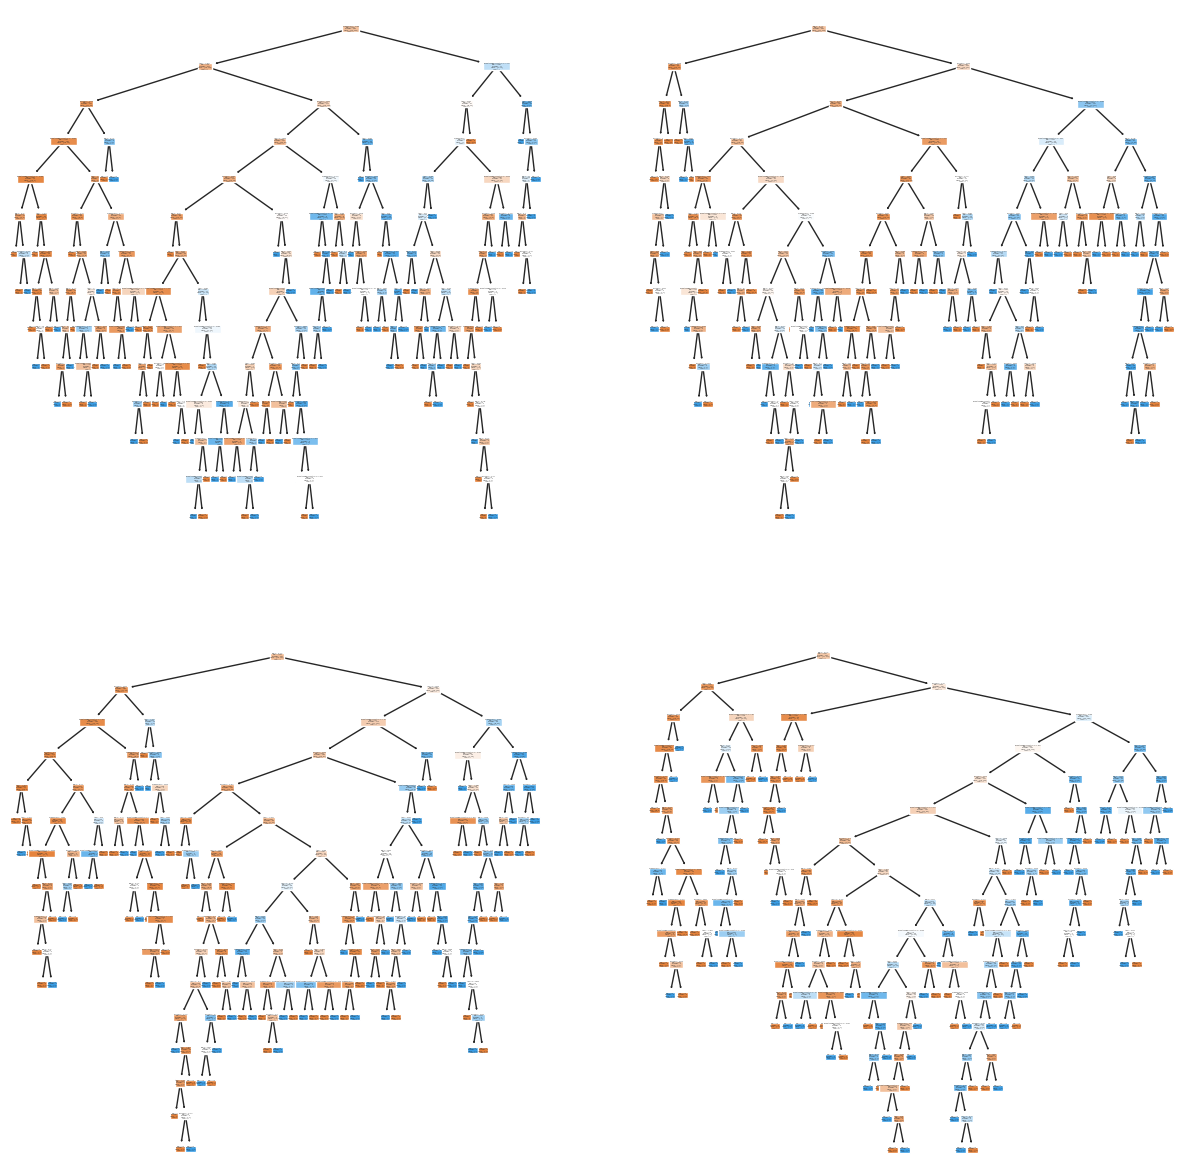

In [20]:
# Visualizamos el random forest
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [21]:
# Predecimos el conjunto de datos de prueba
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [22]:
# Comprobamos la efectividad del modelo. accuracy_score nos muestra la fracción de predicciones que el modelo realizó correctamente
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7337662337662337

## 5. Optimización de hiperparámetros

In [23]:
import numpy as np

n_estimators  = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [25]:
paramgrid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [26]:
rf_model = RandomForestClassifier()


In [29]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf_model, param_grid = paramgrid, cv = 3, verbose = 2, n_jobs = 4)

In [30]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [31]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 64}

In [32]:
print(f'Train Accuracy: {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy: {rf_grid.score(X_test,y_test):.3f}')

Train Accuracy: 0.845
Test Accuracy: 0.747


In [ ]:
# Guardamos el modelo
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))